# Text Generation with Recurrent Neural Networks (RNNs)

In this assignment, you'll build upon your understanding of RNNs and Keras to develop a word-level text generation model.  Your goal is to train a model that learns the stylistic nuances of a chosen corpus and generates new, original text segments that echo the source material's essence.

**Datasets**

We've provided several intriguing text corpora to get you started:

*   Mark Twain
*   Charles Dickens
*   William Shakespeare

**Feel free to explore!**  If you have a particular passion for another author, genre, or a specific text, you're encouraged to use your own dataset of raw text.

In [2]:
# Check if we have a GPU available
import tensorflow as tf

if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("No GPU available. If you're on Colab, go to Runtime > Change runtime and select a GPU hardware accelerator.")

No GPU available. If you're on Colab, go to Runtime > Change runtime and select a GPU hardware accelerator.


In [3]:
dataset = 'downloaded_books/shakespeare.txt'

# Define the fraction of the text to extract
fraction = 0.1

# Open the file and read the specified fraction of text
with open(dataset, 'r', encoding='utf-8') as file:
    raw_text = file.read()

# Extract the first 10% of the text
text = raw_text[:int(fraction * len(raw_text))]


# 1. Data Preparation (Complete or Incomplete)

Before we can begin training an RNN model, we need to prepare the dataset. This involves cleaning the text, tokenizing words, and creating sequences the model can be trained on.

## 1.1 Data Exploration

Print the first 1000 characters of the dataset. Report the dataset's size and the number of unique characters it contains.

In [4]:
# Your code here
# Print the first 1000 characters
print("First 1000 characters:")
print(text[:1000])

# Report dataset size and number of unique characters
dataset_size = len(text)
unique_chars = len(set(text))

print(f"\nDataset size: {dataset_size} characters")
print(f"Number of unique characters: {unique_chars}")

# Calculate and print the number of words
words = text.split()
number_of_words = len(words)
print(f"Number of words: {number_of_words}")

First 1000 characters:
The Project Gutenberg EBook of Hamlet, by William Shakespeare

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org


Title: Hamlet

Author: William Shakespeare

Editor: Charles Kean

Release Date: January 10, 2009 [EBook #27761]

Language: English

Character set encoding: UTF-8

*** START OF THIS PROJECT GUTENBERG EBOOK HAMLET ***




Produced by David Starner, Curtis Weyant and the Online
Distributed Proofreading Team at https://www.pgdp.net









    Transcriber's Note:
    This is a heavily edited version of _Hamlet_. It was used
    for Charles Kean's 1859 stage production. Phrases printed
    in italics in the book are indicated in this electronic
    version by _ (underscore). Footnotes originally appeared
    at the bottom of each page. For this electronic ver

## 1.2 Text Pre-Processing

To prepare the dataset for training, we need to clean the text and create a numerical representation the model can interpret. Perform the following pre-processing steps:

*   Convert the entire text to lowercase.
*   Use the `Tokenizer` class from the `keras.preprocessing.text` module to tokenize the text. You should fit the tokenizer on the text and then convert the text to a sequence of numbers. You can use the `texts_to_sequences` method to do this.

**Note**:
* You'll need to specify an appropriate size for the vocabulary. The number of words in the list of most common words can serve as a guide - does it seem like a reasonable vocabulary size?
* Some of the words will be excluded from the vocabulary, as they don't appear often enough. It's important to provide a value for `oov_token` when creating the Tokenizer instance, so that these words can be represented as "unknown".

In [5]:
from keras.preprocessing.text import Tokenizer

# Your code here
text = text.lower()

# Determine the vocabulary size
vocab_size = 1500  

# Set the out-of-vocabulary token
oov_token = '<OOV>'

# Create and fit the tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts([text])

# Convert text to a sequence of numbers
sequences = tokenizer.texts_to_sequences([text])

# Print text
print(text[:1000])

# Print the first few sequences for verification
print("First few sequences:", sequences[0][:100])

# Print tokenizer word index
print("\nTokenizer word index (first 20 entries):", list(tokenizer.word_index.items())[:20])

the project gutenberg ebook of hamlet, by william shakespeare

this ebook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  you may copy it, give it away or
re-use it under the terms of the project gutenberg license included
with this ebook or online at www.gutenberg.org


title: hamlet

author: william shakespeare

editor: charles kean

release date: january 10, 2009 [ebook #27761]

language: english

character set encoding: utf-8

*** start of this project gutenberg ebook hamlet ***




produced by david starner, curtis weyant and the online
distributed proofreading team at https://www.pgdp.net









    transcriber's note:
    this is a heavily edited version of _hamlet_. it was used
    for charles kean's 1859 stage production. phrases printed
    in italics in the book are indicated in this electronic
    version by _ (underscore). footnotes originally appeared
    at the bottom of each page. for this electronic version
    the footnotes 

If everything worked, the following line should show you the first 10 words in the vocabulary:

In [6]:
try:
    print(list(tokenizer.word_index.items())[:10])
except AttributeError:
    print("Tokenizer has not been initialized. Possible issue: Complete the relevant section of the assignment to initialize it."
)


[('<OOV>', 1), ('the', 2), ('and', 3), ('of', 4), ('to', 5), ('a', 6), ('in', 7), ('i', 8), ('that', 9), ('you', 10)]


## 1.3 Sequence Generation

Now that the text has been tokenized, we need to create sequences the model can be trained on. There are two parts to this:

*   Use the `texts_to_sequences` method from the tokenizer to convert the text to a list of sequences of numbers.
*   Generate the training sequences. Each training sequence should contain `SEQ_LENGTH` token IDs from the text. The target token for each sequence should be the word that follows the sequence in the text.

In [7]:
import numpy as np 

SEQ_LENGTH = 30 # Choose an appropriate sequence length

# Convert the text to a list of sequences of numbers
sequence = tokenizer.texts_to_sequences([text])[0]

# Generate the training sequences
X = []
y = []

# Your code here
for i in range(SEQ_LENGTH, len(sequence)):
    X.append(sequence[i-SEQ_LENGTH:i])
    y.append(sequence[i])

In [8]:
# Convert lists to numpy arrays

X = np.array(X)
y = np.array(y)

# Print the first training sequence and target for verification
print("First training sequence:", X[0])
print("First target:", y[0])

# Print some stats for verification
print(f"\nTotal number of sequences: {len(X)}")
print(f"Sample target word index: {y[0]}")
print(f"Sample target word: {tokenizer.index_word[y[0]]}")

First training sequence: [   2   56   54  411    4  107   28  668  172   20  411   13   16    2
  176    4  669    1   33   43 1095    3   14  412   43    1 1423   10
   85  333]
First target: 15

Total number of sequences: 156641
Sample target word index: 15
Sample target word: it


Assuming your sequences are stored in `X` and the corresponding targets in `y`, the following line should print the first training sequence and its target:

In [9]:
if len(X) > 0 and len(y) > 0:
    print(f'Sequence: {X[0]}\nTarget: {y[0]}')
    print(f'Translated back to words: {[tokenizer.index_word[i] for i in X[0]]} -> {tokenizer.index_word[y[0]]}')
else:
    print("Training sequences have not been generated. Possible issue: Complete the relevant section of the assignment to initialize it.")


Sequence: [   2   56   54  411    4  107   28  668  172   20  411   13   16    2
  176    4  669    1   33   43 1095    3   14  412   43    1 1423   10
   85  333]
Target: 15
Translated back to words: ['the', 'project', 'gutenberg', 'ebook', 'of', 'hamlet', 'by', 'william', 'shakespeare', 'this', 'ebook', 'is', 'for', 'the', 'use', 'of', 'anyone', '<OOV>', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', '<OOV>', 'whatsoever', 'you', 'may', 'copy'] -> it


And the following code will transform y into a one-hot encoded matrix, and split everything into training and validation sets:

In [10]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import numpy as np

# Ensure that tokenizer has been initialized
if oov_token in tokenizer.word_index:
    mask = y != tokenizer.word_index[oov_token]
    X = X[mask]
    y = y[mask]

# One-hot encode the target token
# y = to_categorical(y, num_classes=vocab_size)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_val shape: {X_val.shape}')
print(f'y_val shape: {y_val.shape}')

X_train shape: (101535, 30)
y_train shape: (101535,)
X_val shape: (25384, 30)
y_val shape: (25384,)


# 2. Model Development (Complete or Incomplete)

With the dataset prepared, it's time to develop the RNN model. You'll need to define the architecture of the model, compile it, and prepare it for training.

## 2.1 Model Architecture

Define the architecture of your RNN model. You can design it however you like, but there are a few features that it's important to include:

*   An embedding layer that learns a dense representation of the input tokens. You'll need to specify the input dimension (the size of the vocabulary) and the output dimension (the size of the dense representation). Remember, you can look at the documentation [here](https://keras.io/api/layers/core_layers/embedding/).
*   At least one recurrent layer. We have learned how to use LSTM layers in class, but you can use other types of recurrent layers if you prefer. You can find the documentation [here](https://keras.io/api/layers/recurrent_layers/lstm/).
*   A dense layer with a softmax activation function. This layer will output a probability distribution over the vocabulary, so that the model can make predictions about the next token.

In [12]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

# The size of the dense representation
embedding_dim = 50

# Define and build the model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=SEQ_LENGTH),
    LSTM(units=100),
    Dense(units=vocab_size, activation='softmax')
])

# Print the model summary
if model.layers:
    model.summary()
else:
    print("No layers have been added to the model. Please complete the assignment by adding the required layers.")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 30, 50)            75000     
                                                                 
 lstm_1 (LSTM)               (None, 100)               60400     
                                                                 
 dense_1 (Dense)             (None, 1500)              151500    
                                                                 
Total params: 286,900
Trainable params: 286,900
Non-trainable params: 0
_________________________________________________________________


2024-08-03 21:17:49.409632: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-08-03 21:17:49.413338: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-08-03 21:17:49.414967: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

## 2.2 Model Compilation

Compile the model with an appropriate loss function and optimizer. You might also want to track additional metrics, such as accuracy.

Give a short explanation of your choice of loss function and optimizer:

_your explanation here_

In [13]:
# Your code here
# Compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Build the model with the specified input shape
model.build(input_shape=(None, SEQ_LENGTH))

# Print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 30, 50)            75000     
                                                                 
 lstm_1 (LSTM)               (None, 100)               60400     
                                                                 
 dense_1 (Dense)             (None, 1500)              151500    
                                                                 
Total params: 286,900
Trainable params: 286,900
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Perform prediction on the first sample of the training data
output = model.predict(X_train[:1])

# Print the output shape and the true label shape
print(f"Output shape: {output.shape}")
print(f"Predicted shape: {y_train[:1].shape}")


1/1 [==============================] - 0s 40ms/step
Output shape: (1, 1500)
Predicted shape: (1,)


## 2.3 Model Training

Train the model on the training data you've prepared.

* Train your model for 5 epochs with a batch size of 128. Use the validation data for validation.
* Store the training history in a variable called `history`.

In [17]:
from sklearn.model_selection import train_test_split

# Set training parameters
epochs = 5
batch_size = 128

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and validation sets
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_val shape: {X_val.shape}')
print(f'y_val shape: {y_val.shape}')

# Pint for NaN or Inf values in the datasets
print(f"Check NaN in X_train: {np.isnan(X_train).any()}")
print(f"Check NaN in y_train: {np.isnan(y_train).any()}")
print(f"Check Inf in X_train: {np.isinf(X_train).any()}")
print(f"Check Inf in y_train: {np.isinf(y_train).any()}")


X_train shape: (101535, 30)
y_train shape: (101535,)
X_val shape: (25384, 30)
y_val shape: (25384,)
Check NaN in X_train: False
Check NaN in y_train: False
Check Inf in X_train: False
Check Inf in y_train: False


In [19]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_val, y_val)
)

# Evaluate the model on the validation data
loss, accuracy = model.evaluate(X_val, y_val)

# Print validation loss and accuracy
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")


Epoch 1/5
794/794 [==============================] - 92s 116ms/step - loss: 4.7960 - accuracy: 0.1439 - val_loss: 4.8665 - val_accuracy: 0.1448
Epoch 2/5
794/794 [==============================] - 103s 130ms/step - loss: 4.6972 - accuracy: 0.1504 - val_loss: 4.8064 - val_accuracy: 0.1517
Epoch 3/5
794/794 [==============================] - 98s 124ms/step - loss: 4.6139 - accuracy: 0.1570 - val_loss: 4.7599 - val_accuracy: 0.1537
Epoch 4/5
794/794 [==============================] - 124s 156ms/step - loss: 4.5410 - accuracy: 0.1626 - val_loss: 4.7211 - val_accuracy: 0.1569
Epoch 5/5
794/794 [==============================] - 21s 26ms/step - loss: 4.6938 - accuracy: 0.1604
Validation Loss: 4.693796157836914
Validation Accuracy: 0.16037660837173462


Plot the training history to visualize the model's learning progress. Your plot should include the training and validation loss.

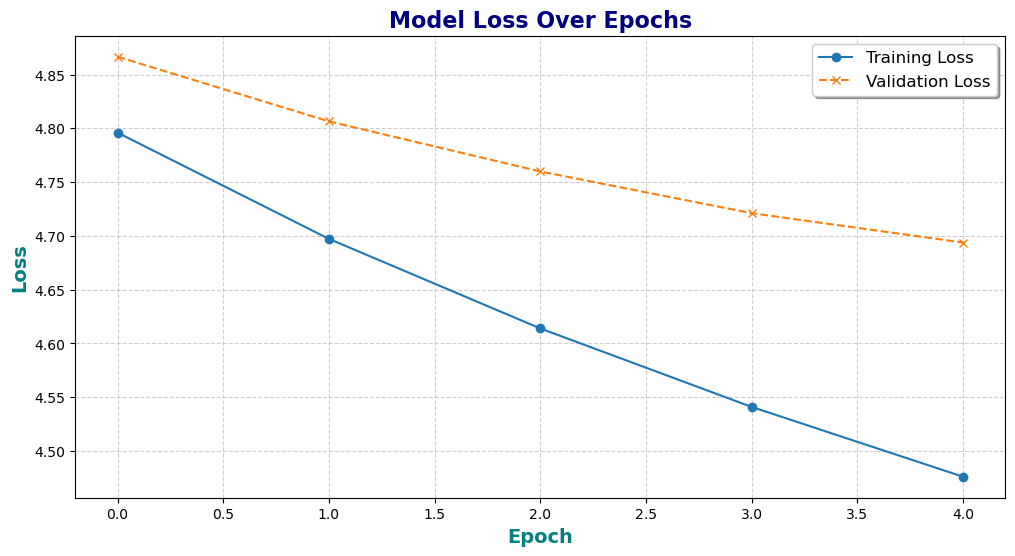

In [20]:
import matplotlib.pyplot as plt

# Your code here

# Plot the training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', linestyle='-', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--', marker='x')

# Add titles and labels with modern fonts
plt.title('Model Loss Over Epochs', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('Epoch', fontsize=14, fontweight='bold', color='teal')
plt.ylabel('Loss', fontsize=14, fontweight='bold', color='teal')

# Add a legend with improved aesthetics
plt.legend(loc='upper right', fontsize=12, frameon=True, shadow=True)

# Add a grid for better visualization
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()


# 3. Text Generation (Complete or Incomplete)

Write a method called `generate_text` that uses the trained model to generate new text. The method should take the following parameters:

*   `model`: The trained RNN model.
*   `tokenizer`: The tokenizer used to pre-process the text data.
*   `seed_text`: The seed text the model will use to generate new text.
*   `max_sequence_len`: The maximum length of the sequence used to generate new text.

The method should return the generated text.

An overview of the text generation process you should follow:

1. Tokenize the seed text using the tokenizer we built before.
2. Pad the sequences to the same length as the training sequences - you can use the `pad_sequences` method from the `keras.preprocessing.sequence` module, which is documented [here](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/pad_sequences).
3. Use the model to predict the next token in the sequence. Remember that the model will output a probability distribution over the vocabulary, so you'll need to use `np.argmax` to find the token with the highest probability.
4. Add the predicted token to the sequence and remove the first token.
5. Repeat steps 3-4 until you have generated the desired number of tokens.
6. Convert the generated token IDs back to words and return the combined result as a single string.

This is a challenging task, so don't hesitate to ask for help if you need it. It's okay if the generated text doesn't make much sense yet - we'll work on improving the model next.
As a bonus, you can make your method generate "gpt-style" by having it print out each word as it's generated, so you can see the text being generated in real time.

In [41]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

def get_predicted_word(model, sequence, vocab_size):
    """
    Get the predicted word from the model.
    This helper function uses a concept we haven't covered in class yet: temperature.
    In essence, a little bit of randomness in what word we predict can make the text more interesting.
    """

    # Use the model to predict the next token in the sequence
    yhat = model.predict(sequence, verbose=0)

    # Get the index of the predicted word, according to the probabilities
    yhat = np.random.choice(range(vocab_size), p=yhat.ravel())

    return yhat
def generate_text(model, tokenizer, seed_text, max_sequence_lennum_words_to_generate=50):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
  
    generated_text = seed_text
    
    for _ in range(num_words_to_generate):
        token_list_padded = pad_sequences([token_list], maxlen=max_sequence_len, padding='pre')
        
        predicted_token = get_predicted_word(model, token_list_padded)
        
        token_list.append(predicted_token)
        
        token_list = token_list[1:]
        
        predicted_word = tokenizer.index_word[predicted_token]
        generated_text += ' ' + predicted_word
    
    return generated_text

In [45]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

def get_predicted_word(model, sequence):
    """
    Get the predicted word from the model.
    This helper function uses a concept we haven't covered in class yet: temperature.
    In essence, a little bit of randomness in what word we predict can make the text more interesting.
    """

    # Use the model to predict the next token in the sequence
    yhat = model.predict(sequence, verbose=0)

    # Get the index of the predicted word, according to the probabilities
    predicted_index = np.random.choice(range(yhat.shape[1]), p=yhat.ravel())
    return predicted_index

def generate_text(model, tokenizer, seed_text, max_sequence_len):
    """
    Generate new text using the trained model.
    You can use the `get_predicted_word` helper function to help you with this.
    """
    generated_text = seed_text
    
    seed_sequence = tokenizer.texts_to_sequences([seed_text])[0]
    
    # Pad the sequence to the same length as the training sequences
    padded_sequence = pad_sequences([seed_sequence], maxlen=max_sequence_len, padding='pre')
    
    # Get the predicted word index
    predicted_index = get_predicted_word(model, padded_sequence)
    
    # Convert predicted index to word
    predicted_word = tokenizer.index_word.get(predicted_index, '')
    
    # Append the predicted word to the generated text
    generated_text += ' ' + predicted_word
    
    return generated_text

In [46]:
# Test the text generation function
generate_text(model, tokenizer, 'hamlet', SEQ_LENGTH)

'hamlet c'

It's likely that the text generated by your model doesn't make much sense yet. This is because the model hasn't been trained for very long, and the training dataset is relatively small. 

# 4. Model Refinement (Complete or Incomplete)

In this last section, you'll work on improving your model. There are many ways to do this, but here are a few ideas to get you started:

* Use pre-trained embeddings: the code below will help you to load pre-trained embeddings through Keras. 
* Experiment with different model architectures, including the number of layers, the number of units in each layer, and the use of dropout layers.
* Train your model for longer. You can also experiment with different batch sizes.

Implement and test out at least one of these ideas. If you have other ideas for improving the model, feel free to try them out as well.

In [48]:
# Load the pre-trained embeddings
embeddings_index = {}
try:
    with open('glove.6B.100d.txt', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    print(f'Found {len(embeddings_index)} word vectors.')
except FileNotFoundError:
    print("'glove.6B.100d.txt' File not found. Please make sure you have ran the previous cell.")

Found 400000 word vectors.


In [50]:
# Check if VOCAB_SIZE is set
if vocab_size is None:
    print("You need to complete the previous parts of your assignment in order for this to work.")
else:
    # Create an embedding matrix
    embedding_matrix = np.zeros((vocab_size, 100))
    for word, i in tokenizer.word_index.items():
        if i < vocab_size:
            embedding_vector = embeddings_index.get(word)
            if embedding_vector is not None:
                embedding_matrix[i] = embedding_vector

In [52]:
# Check if VOCAB_SIZE is set
if vocab_size is None:
    print("You need to complete the previous parts of your assignment in order for this to work.")
else:
    embedding_layer = Embedding(
        vocab_size, 100, weights=[embedding_matrix], input_length=SEQ_LENGTH, trainable=False
    )

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define a new model
model = Sequential([
    embedding_layer,
    LSTM(128, return_sequences=True),
    Dropout(0.2),
    LSTM(128),
    Dropout(0.2),
    Dense(vocab_size, activation='softmax')
])

# Compile the model with sparse categorical cross-entropy
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Summary of the model
model.summary()

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=15, batch_size=64)


2024-08-03 22:20:40.707056: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-08-03 22:20:40.709281: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-08-03 22:20:40.713210: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 30, 100)           150000    
                                                                 
 lstm_10 (LSTM)              (None, 30, 128)           117248    
                                                                 
 dropout_8 (Dropout)         (None, 30, 128)           0         
                                                                 
 lstm_11 (LSTM)              (None, 128)               131584    
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 1500)              193500    
                                                                 
Total params: 592,332
Trainable params: 442,332
Non-tr

2024-08-03 22:20:41.040617: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-08-03 22:20:41.044675: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-08-03 22:20:41.048363: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/15


2024-08-03 22:20:41.622644: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-08-03 22:20:41.624894: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-08-03 22:20:41.630647: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1270/1270 [==============================] - ETA: 0s - loss: 5.8765 - accuracy: 0.0643

2024-08-03 22:24:36.371141: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-08-03 22:24:36.380472: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-08-03 22:24:36.384161: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1270/1270 [==============================] - 259s 201ms/step - loss: 5.8765 - accuracy: 0.0643 - val_loss: 5.6000 - val_accuracy: 0.0762
Epoch 2/15
1270/1270 [==============================] - 232s 183ms/step - loss: 5.4267 - accuracy: 0.0877 - val_loss: 5.2475 - val_accuracy: 0.0987
Epoch 3/15
1270/1270 [==============================] - 223s 176ms/step - loss: 5.1477 - accuracy: 0.1081 - val_loss: 5.0480 - val_accuracy: 0.1180
Epoch 4/15
1270/1270 [==============================] - 221s 174ms/step - loss: 4.9756 - accuracy: 0.1207 - val_loss: 4.9346 - val_accuracy: 0.1295
Epoch 5/15
1270/1270 [==============================] - 221s 174ms/step - loss: 4.8548 - accuracy: 0.1292 - val_loss: 4.8604 - val_accuracy: 0.1358
Epoch 6/15
1270/1270 [==============================] - 216s 170ms/step - loss: 4.7585 - accuracy: 0.1352 - val_loss: 4.8078 - val_accuracy: 0.1381
Epoch 7/15
1270/1270 [==============================] - 226s 178ms/step - loss: 4.6780 - accuracy: 0.1409 - val_loss: 4.759

In [58]:
# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)

# Print the evaluation results
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")


794/794 [==============================] - 46s 58ms/step - loss: 4.6462 - accuracy: 0.1701
Validation Loss: 4.6462
Validation Accuracy: 0.1701


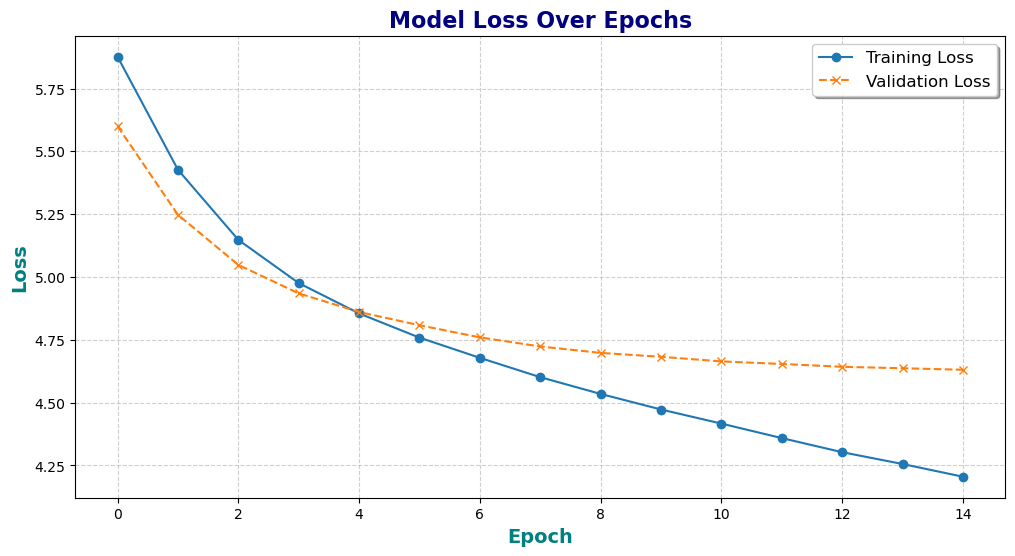

In [59]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', linestyle='-', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--', marker='x')

# Add titles and labels with modern fonts
plt.title('Model Loss Over Epochs', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('Epoch', fontsize=14, fontweight='bold', color='teal')
plt.ylabel('Loss', fontsize=14, fontweight='bold', color='teal')

# Add a legend with improved aesthetics
plt.legend(loc='upper right', fontsize=12, frameon=True, shadow=True)

# Add a grid for better visualization
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()


In [61]:
# Define the get_predicted_word function
def get_predicted_word(model, sequence):
    yhat = model.predict(sequence, verbose=0)
    yhat = np.random.choice(range(yhat.shape[1]), p=yhat.ravel())
    return yhat

# Define the generate_text function
def generate_text(model, tokenizer, seed_text, max_sequence_len, num_words_to_generate=50):
    # Tokenize the seed text
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    
    # Initialize the generated text with the seed text
    generated_text = seed_text
    
    for _ in range(num_words_to_generate):
        # Pad the token list to the max sequence length
        token_list_padded = pad_sequences([token_list], maxlen=max_sequence_len, padding='pre')
        
        # Predict the next word
        predicted_token = get_predicted_word(model, token_list_padded)
        
        # Add the predicted token to the token list
        token_list.append(predicted_token)
        
        # Remove the first token to maintain the sequence length
        token_list = token_list[1:]
        
        # Convert the predicted token to a word and append to the generated text
        predicted_word = tokenizer.index_word.get(predicted_token, '')
        generated_text += ' ' + predicted_word
    
    return generated_text

In [63]:
# Define seed text and maximum sequence length
seed_text = "Look at the starts"
max_sequence_len = SEQ_LENGTH
generated_text = generate_text(model, tokenizer, seed_text, max_sequence_len, num_words_to_generate=50)
print(generated_text)

2024-08-03 23:27:23.712514: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-08-03 23:27:23.715414: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-08-03 23:27:23.716851: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Look at the starts are on the sea by richard advice place cassio died line in hamlet history of a brother who the fellow but thus verse of hamlet vi vi i 2 green angelo flowers the strange a friar in the first plays of making rowe set she saw a next proteus not


## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨**Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)**🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-2`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_2.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.